In [2]:
import sys
sys.path.append('/home/nick/projects')
import importlib
import pandas as pd
import plotly.express as px

In [3]:
import pandas as pd
test_path0 = "/media/nick/hdd02/Cole Trapnell's Lab Dropbox/Nick Lammers/Nick/pecfin_dynamics/point_cloud_data/nucleus_point_features/20240619_well0000_time0044_points_features.csv"
test_points0 = pd.read_csv(test_path0)

test_path1 = "/media/nick/hdd02/Cole Trapnell's Lab Dropbox/Nick Lammers/Nick/pecfin_dynamics/point_cloud_data/nucleus_point_features/20240619_well0000_time0045_points_features.csv"
test_points1 = pd.read_csv(test_path1)

print(test_points0.shape)

(7690, 522)


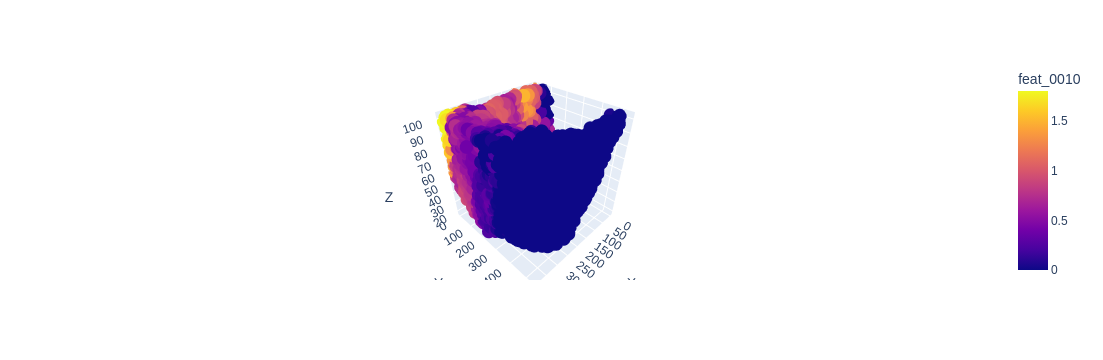

In [6]:
import plotly.express as px
fig = px.scatter_3d(test_points0, x="X", y="Y", z="Z", color="feat_0010")
fig.show()

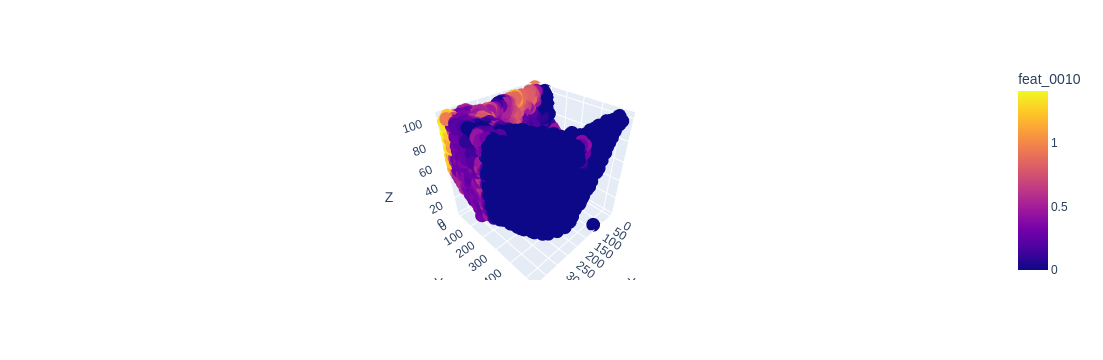

In [7]:
import plotly.express as px
fig = px.scatter_3d(test_points1, x="X", y="Y", z="Z", color="feat_0010")
fig.show()

In [39]:
from sklearn.decomposition import PCA

feature_cols = [col for col in test_points.columns if "feat_" in col]
feature_array = test_points.loc[:, feature_cols].to_numpy()

pca = PCA(n_components=3)
pca.fit(feature_array)
pca_array = pca.transform(feature_array)
pca_array.shape

(7690, 3)

In [9]:
import glob2 as glob

# check labels
label_dir = test_path1 = "/media/nick/hdd02/Cole Trapnell's Lab Dropbox/Nick Lammers/Nick/pecfin_dynamics/point_cloud_data/fin_segmentation/"
lb_list = glob.glob(label_dir + "*.csv")
lb_df = pd.read_csv(lb_list[0])
lb_df.head()

,Z,Y,X,experiment_date,seg_model,well_num,time_int,fin_curation_flag,nucleus_id,size,fin_label_curr,fin_label_pd,binary_flag,fin_label_final
0,37.533777,323.923917,37.421767,20240619,tdTom-bright-log-v5,3,120,False,1,2931.0,0,2,False,2
1,38.810300,148.284398,71.121382,20240619,tdTom-bright-log-v5,3,120,False,2,2301.0,0,1,False,1
2,37.047842,171.199625,47.430707,20240619,tdTom-bright-log-v5,3,120,False,3,1599.0,0,1,False,1
3,41.236387,172.378361,113.503559,20240619,tdTom-bright-log-v5,3,120,False,4,3526.0,0,1,False,1
4,39.104181,178.897235,10.476332,20240619,tdTom-bright-log-v5,3,120,False,5,1483.0,0,2,False,2


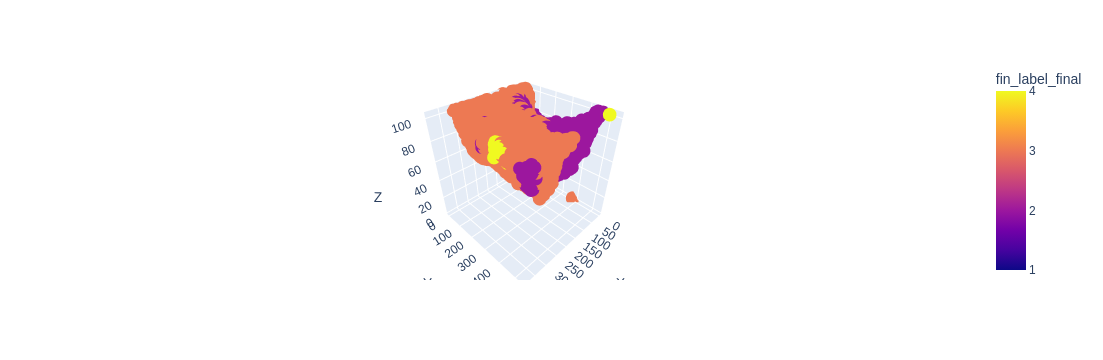

In [10]:
fig = px.scatter_3d(lb_df, x="X", y="Y", z="Z", color="fin_label_final")
fig.show()